### Projeto Final Para Conclusão do Curso de Cientista de Dados

Instituição: Infnet

Aluno: Marcio Carvalho

Projeto: Predição da expectativa de vida no mundo de acordo diversos fatores de saúde e sócio econômicos.

Dados: O repositório de dados é da Global Health Observatory (GHO), portal de conjunto de dados da Organização Mundial da Saúde (OMS) para estatísticas relacionadas à saúde de 183 Estados Membros. Os dados econômicos correspondentes foram coletados do site das Nações Unidas. Inicialmente os respectivos dados foram coletados e organizados no Site: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who. pelo responsável KumarRajarshi.
             


Período: 2000-2015

As colunas a seguir estão incluídas no conjunto de dados:

• Country: país - 193 países

• year: Anos (2000 - 2015)

• Status: país desenvolvido ou em desenvolvimento

• Adult Mortality: Taxas de mortalidade adulta de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes)

• infant Deaths: Número de óbitos infantis por 1.000 habitantes

• Alcohol: Álcool, consumo registrado per capita (15+) (em litros de álcool puro)

• percentage expenditure: Despesa percentual - Gastos com saúde como porcentagem do Produto Interno Bruto per capita (%)

• Hepatitis B: Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%)

• Measles: Sarampo - número de casos notificados por 1000 habitantes

• BMI: Índice de Massa Corporal Médio de toda a população

• under-five deathes: Número de mortes de menores de cinco anos por 1000 habitantes

• Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)

• Total expenditure: Despesas totais - Gastos do governo geral com saúde como porcentagem do gasto total do governo (%)

• Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)

• Diphtheria: Difteria - Cobertura vacinal contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%)

• HIV/AIDS: Mortes por 1000 nascidos vivos HIV/AIDS (0-4 anos)

• GDP: Produto Interno Bruto per capita (em USD)

• Population: População do país

• thinness 1-19 years: Prevalência de magreza em crianças e adolescentes de 1 a 19 anos (%)

• thinness 5-9 years: Prevalência de magreza em crianças de 5 a 9 anos (%)

• Income composition of resources: Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1)

• Schooling: Número de anos de escolaridade (anos)

• Life Expectancy: Expectativa de vida em anos (coluna Alvo)


### Criação do Modelo de Predição

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_completo = pd.read_csv('Expectativa_de_vida_tratado.csv')

In [3]:
df_completo.head(3)

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,...,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [4]:
df_des = df_completo[df_completo['Classificacao']=='Developed']
df_des.head(3)

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,...,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
112,Australia,2015,Developed,82.8,59.0,1,10.155333,0.00000,93.0,74,...,93.0,8.836667,93.0,0.1,56554.3876,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.710000,10769.36305,91.0,340,...,92.0,9.420000,92.0,0.1,62214.6912,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.870000,11734.85381,91.0,158,...,91.0,9.360000,91.0,0.1,67792.3386,23117353.0,0.6,0.6,0.933,20.3


In [5]:
df_emdes = df_completo[df_completo['Classificacao']=='Developing']
df_emdes.head(3)

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,...,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [6]:
print(df_completo.shape)
print (df_des.shape)
print (df_emdes.shape)

(2928, 22)
(512, 22)
(2416, 22)


In [7]:
def preparacao(def_model):
   df_model = def_model.drop(columns=['PaIs','Ano'])
   df_model = pd.get_dummies(df_model,columns=['Classificacao'])
   x = df_model.drop(columns='Expectativa_de_Vida')
   y = df_model.Expectativa_de_Vida
   return x , y

In [8]:
def treino_teste (X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20) 
    return X_train, X_test, Y_train, Y_test

In [9]:
def normalizacao(X_train, X_test):
    scaler = StandardScaler()
    scaler_fit = scaler.fit(X_train)
    X_train_norm = scaler_fit.transform(X_train)
    X_train_dfnorm = pd.DataFrame(X_train_norm,columns=X_train.columns)
    X_test_norm = scaler_fit.transform(X_test)
    X_test_dfnorm = pd.DataFrame(X_test_norm,columns=X_train.columns)
    return X_train_norm , X_train_dfnorm , X_test_norm , X_test_dfnorm, scaler_fit

In [10]:
def selecao(X_train , X_test , Y_train , Y_test): 
    X_rank = pd.concat([X_train, X_test])
    Y_rank = pd.concat([Y_train, Y_test])
    for model in [DummyRegressor,SVR,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor]:
      cls = model()
      kfold = KFold(n_splits=10,shuffle=True, random_state=20 )
      s = cross_val_score(cls, X_rank, Y_rank, scoring="neg_mean_squared_error", cv=kfold)
      print(f"{model.__name__:22} MSE: "f"{s.mean():.3f} STD: {s.std():.2f}")

In [11]:
def modelo (x_train , y_train):
   param_grid = {
    'bootstrap': [True],
    'max_depth': [20],
    'max_features': [0.4],
    'min_samples_leaf': [1],
    'min_samples_split': [2,3],
    'n_estimators': [20,700,800],
    'random_state': [20],
   }
   rf = RandomForestRegressor()
   grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 3,scoring='neg_mean_squared_error',return_train_score=True)
   grid_search.fit(x_train, y_train)
   return grid_search

In [12]:
def metrica(y_test,x_test,model):
    metrica = mean_squared_error(y_test,model.predict(x_test),squared=False)
    return metrica

In [46]:
def importante (x_train,feature):
   #var_importante = []
   for col, val in sorted(zip(x_train.columns,feature),  key=lambda x: x[1],reverse=True)[:5]:
      imp_df = pd.DataFrame({
         "Feature Name": col,
         "Importance": val
      }) 
      #var_importante.append( f"{col:10}{val:10.3f}")
   return imp_df

In [59]:
def importante1 (x_train,feature):
    imp_df = pd.DataFrame({"Feature Name": x_train.columns,"Importance": feature})
    fi = imp_df.sort_values(by='Importance',ascending=False)
    return fi

In [14]:
def completo(X,modelo):
    scaler = StandardScaler()
    X_completo = scaler.fit_transform(X)
    yhat = modelo.predict(X_completo)
    return yhat , X_completo

In [15]:
# Preparação dos 3 dataframes
x_full , y_full = preparacao (df_completo)
x_des , y_des = preparacao (df_des)
x_emdes , y_emdes = preparacao (df_emdes)

In [16]:
X_train_full, X_test_full, Y_train_full, Y_test_full = treino_teste (x_full , y_full)
X_train_des, X_test_des, Y_train_des, Y_test_des = treino_teste (x_des , y_des)
X_train_emdes, X_test_emdes, Y_train_emdes, Y_test_emdes = treino_teste (x_emdes , y_emdes)
print(X_train_full.shape)
print (X_train_des.shape)
print (X_train_emdes.shape)

(2342, 20)
(409, 19)
(1932, 19)


Text(0.5, 1.0, 'Distribuição de Dados de Treinamento por Dataframe')

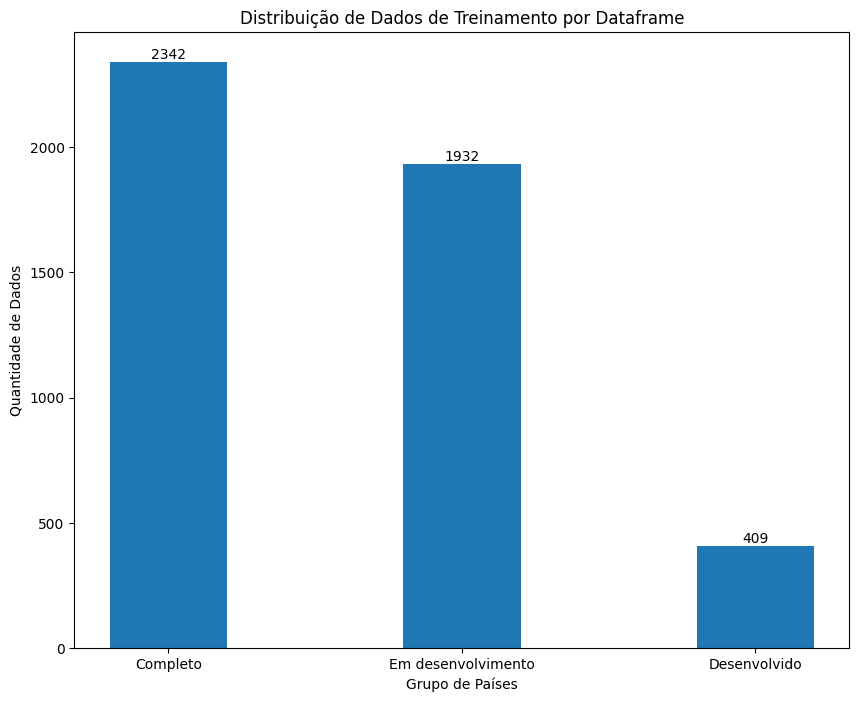

In [17]:
fig, ax = plt.subplots (figsize=(10,8))
tamanho = [ X_train_full.shape[0],X_train_emdes.shape[0],X_train_des.shape[0]]
dataframe = ['Completo','Em desenvolvimento', 'Desenvolvido']
ax1 = ax.bar (dataframe, tamanho, width=-0.4)
ax.bar_label(ax1, fmt="%.0f", size=10)
plt.ylabel('Quantidade de Dados')
plt.xlabel('Grupo de Países')
plt.title('Distribuição de Dados de Treinamento por Dataframe')

Text(0.5, 1.0, 'Distribuição de Dados de Teste por Dataframe')

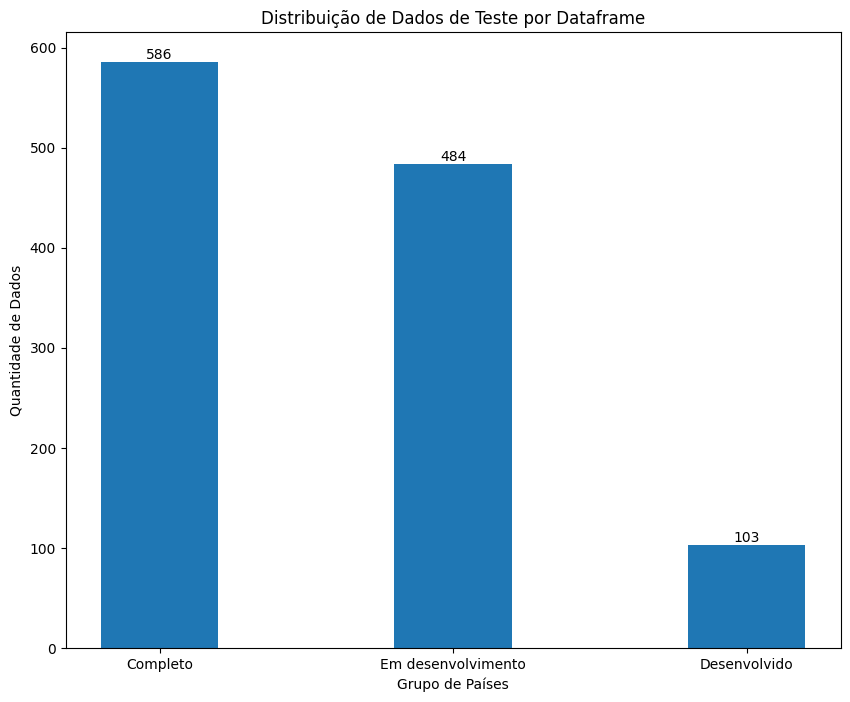

In [18]:
fig, ax = plt.subplots (figsize=(10,8))
tamanho = [ X_test_full.shape[0],X_test_emdes.shape[0],X_test_des.shape[0]]
dataframe = ['Completo','Em desenvolvimento', 'Desenvolvido']
ax1 = ax.bar (dataframe, tamanho, width=-0.4)
ax.bar_label(ax1, fmt="%.0f", size=10)
plt.ylabel('Quantidade de Dados')
plt.xlabel('Grupo de Países')
plt.title('Distribuição de Dados de Teste por Dataframe')


In [19]:
X_train_norm_full , X_train_dfnorm_full , X_test_norm_full , X_test_dfnorm_full, scaler_full = normalizacao(X_train_full, X_test_full)
X_train_norm_des , X_train_dfnorm_des , X_test_norm_des , X_test_dfnorm_des,scaler_full = normalizacao(X_train_des, X_test_des)
X_train_norm_emdes, X_train_dfnorm_emdes, X_test_norm_emdes, X_test_dfnorm_emdes,scaler_full = normalizacao(X_train_emdes, X_test_emdes)

In [20]:
# Seleção dos melhores modelos configurado como padrão.
print("Dataset todos os países:")
selecao (X_train_dfnorm_full , X_test_dfnorm_full, Y_train_full, Y_test_full)
print(f" Dataset países desenvolvidos:")
selecao (X_train_dfnorm_des, X_test_dfnorm_des,Y_train_des, Y_test_des)
print(f" Dataset países em desenvolvimento:")
selecao(X_train_dfnorm_emdes, X_test_dfnorm_emdes,Y_train_emdes, Y_test_emdes)

Dataset todos os países:
DummyRegressor         MSE: -90.759 STD: 5.19
SVR                    MSE: -11.957 STD: 1.54
DecisionTreeRegressor  MSE: -6.972 STD: 1.21
RandomForestRegressor  MSE: -3.234 STD: 0.50
GradientBoostingRegressor MSE: -5.012 STD: 0.64
MLPRegressor           MSE: -15.262 STD: 1.52
 Dataset países desenvolvidos:
DummyRegressor         MSE: -15.453 STD: 3.20
SVR                    MSE: -5.359 STD: 1.41
DecisionTreeRegressor  MSE: -6.410 STD: 2.52
RandomForestRegressor  MSE: -3.054 STD: 0.80
GradientBoostingRegressor MSE: -3.479 STD: 0.79
MLPRegressor           MSE: -413.305 STD: 51.70
 Dataset países em desenvolvimento:
DummyRegressor         MSE: -81.174 STD: 3.42
SVR                    MSE: -12.973 STD: 1.57
DecisionTreeRegressor  MSE: -7.070 STD: 1.33
RandomForestRegressor  MSE: -3.352 STD: 0.58
GradientBoostingRegressor MSE: -4.965 STD: 0.73
MLPRegressor           MSE: -34.321 STD: 2.79


In [21]:
modelo_full = modelo (X_train_dfnorm_full,Y_train_full)
modelo_des = modelo (X_train_dfnorm_des,Y_train_des)
modelo_emdes = modelo (X_train_dfnorm_emdes,Y_train_emdes)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [22]:
print ('Melhores parâmetros dataset todos os países: \n', modelo_full.best_params_)
print('Melhores parâmetros dataset países desenvolvidos: \n' ,modelo_des.best_params_)
print('Melhores parâmetros dataset países emdesenvolvimento: \n' ,modelo_emdes.best_params_)

Melhores parâmetros dataset todos os países: 
 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 800, 'random_state': 20}
Melhores parâmetros dataset países desenvolvidos: 
 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800, 'random_state': 20}
Melhores parâmetros dataset países emdesenvolvimento: 
 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800, 'random_state': 20}


In [23]:
modelo_full.best_index_

5

In [24]:
modelo_full.cv_results_

{'mean_fit_time': array([ 0.79147587, 25.88451195, 30.46208191,  0.91086924, 26.74592576,
        26.762198  ]),
 'std_fit_time': array([0.07755947, 2.62551625, 3.38309373, 0.11229707, 2.62395449,
        2.53175379]),
 'mean_score_time': array([0.01369147, 0.21523855, 0.24291966, 0.01150885, 0.22045076,
        0.20343974]),
 'std_score_time': array([0.00808228, 0.02893177, 0.04852955, 0.00744792, 0.03762882,
        0.03834705]),
 'param_bootstrap': masked_array(data=[True, True, True, True, True, True],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[20, 20, 20, 20, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'para

In [25]:
print ('Melhor pontuação para dataset de validação todos os países: \n', abs(modelo_full.best_score_))
print('Melhor pontuação para dataset de validação países desenvolvidos: \n', abs(modelo_des.best_score_))
print('Melhor pontuação para dataset de validação países em desenvolvimento: \n', abs(modelo_emdes.best_score_))

Melhor pontuação para dataset de validação todos os países: 
 3.43792308441983
Melhor pontuação para dataset de validação países desenvolvidos: 
 3.121364981981749
Melhor pontuação para dataset de validação países em desenvolvimento: 
 3.254374366112154


In [26]:
metrica_full = metrica (Y_test_full,X_test_norm_full,modelo_full)
metrica_des = metrica (Y_test_des,X_test_norm_des,modelo_des)
metrica_emdes = metrica (Y_test_emdes,X_test_norm_emdes,modelo_emdes)

In [27]:
print ('Erro médio quadrático dataset todos os países: \n', metrica_full)
print('Erro médio quadrático países desenvolvidos: \n', metrica_des)
print('Erro médio quadrático países em desenvolvimento: \n', metrica_emdes)

Erro médio quadrático dataset todos os países: 
 1.6772599333335565
Erro médio quadrático países desenvolvidos: 
 2.053013300323541
Erro médio quadrático países em desenvolvimento: 
 1.8969898397950706


Text(0.5, 1.0, 'Erro Médio Quadrático')

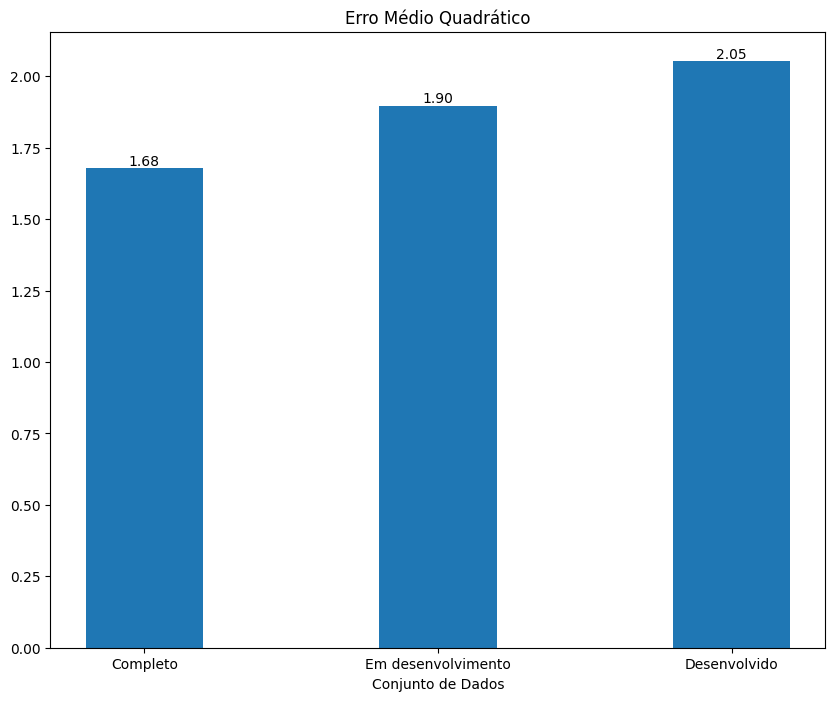

In [28]:
fig, ax = plt.subplots (figsize=(10,8))
tamanho = [ metrica_full,metrica_emdes,metrica_des]
dataframe = ['Completo','Em desenvolvimento', 'Desenvolvido']
ax1 = ax.bar (dataframe, tamanho, width=-0.4)
ax.bar_label(ax1, fmt="%.2f", size=10)
plt.xlabel('Conjunto de Dados')
plt.title('Erro Médio Quadrático')

In [29]:
yhat_completo_full, X_completo_full = completo(x_full, modelo_full)
yhat_completo_des, X_completo_des = completo(x_des, modelo_des)
yhat_completo_emdes, X_completo_emdes = completo(x_emdes, modelo_emdes)

In [30]:
results_full = pd.DataFrame(zip(df_completo['PaIs'],df_completo['Ano'],df_completo['Classificacao'],y_full, yhat_completo_full, y_full - yhat_completo_full), columns = ['PaIs','Ano','Classificacao','Expectativa_Vida_real', 'Expectativa_Vida_previsto', 'Erro'])
results_full[::20]

,PaIs,Ano,Classificacao,Expectativa_Vida_real,Expectativa_Vida_previsto,Erro
0,Afghanistan,2015,Developing,65.0,63.348404,1.651596
20,Albania,2011,Developing,76.6,76.456180,0.143820
40,Algeria,2007,Developing,73.8,73.335380,0.464620
60,Angola,2003,Developing,46.8,47.632599,-0.832599
80,Argentina,2015,Developing,76.3,76.416321,-0.116321
...,...,...,...,...,...,...
2840,Vanuatu,2007,Developing,73.0,72.877812,0.122188
2860,Venezuela (Bolivarian Republic of),2003,Developing,72.4,72.627280,-0.227280
2880,Yemen,2015,Developing,65.7,64.610620,1.089380
2900,Zambia,2011,Developing,58.2,57.960701,0.239299


In [31]:
results_des = pd.DataFrame(zip(df_des['PaIs'],df_des['Ano'],df_des['Classificacao'],y_des, yhat_completo_des, y_des - yhat_completo_des), columns = ['PaIs','Ano','Classificacao','Expectativa_Vida_real', 'Expectativa_Vida_previsto', 'Erro'])
results_des.head(3)

,PaIs,Ano,Classificacao,Expectativa_Vida_real,Expectativa_Vida_previsto,Erro
0,Australia,2015,Developed,82.8,82.898163,-0.098163
1,Australia,2014,Developed,82.7,82.716604,-0.016604
2,Australia,2013,Developed,82.5,82.637149,-0.137149


In [32]:
results_emdes = pd.DataFrame(zip(df_emdes['PaIs'],df_emdes['Ano'],df_emdes['Classificacao'],y_emdes, yhat_completo_emdes, y_emdes - yhat_completo_emdes), columns = ['PaIs','Ano','Classificacao','Expectativa_Vida_real', 'Expectativa_Vida_previsto', 'Erro'])
results_emdes.head(3)

,PaIs,Ano,Classificacao,Expectativa_Vida_real,Expectativa_Vida_previsto,Erro
0,Afghanistan,2015,Developing,65.0,63.398750,1.601250
1,Afghanistan,2014,Developing,59.9,60.160569,-0.260569
2,Afghanistan,2013,Developing,59.9,61.139875,-1.239875


In [33]:
results_full_des = results_full[results_full['Classificacao']=='Developed']
results_full_des['Erro'].abs().mean() 

0.7002440369371038

In [34]:
results_full_emdes = results_full[results_full['Classificacao']=='Developing']
results_full_emdes['Erro'].abs().mean() # resultado anos

0.6474750446748195

In [35]:
results_des['Erro'].abs().mean() 

0.7366944539277797

In [36]:
results_emdes['Erro'].abs().mean() 

0.7310441958651617

In [61]:
#modelo_full.best_estimator_.feature_importances_
importante_full_grid_search = importante (X_train_full,modelo_full.best_estimator_.feature_importances_)
importante_des_grid_search = importante (X_train_des,modelo_des.best_estimator_.feature_importances_)
importante_emdes_grid_search = importante (X_train_emdes,modelo_emdes.best_estimator_.feature_importances_)
#importante_full, rf_full = importante (X_train_full,Y_train_full)
#importante_des, rf_des = importante (X_train_des,Y_train_des)
#importante_emdes, rf_emdes = importante (X_train_emdes,Y_train_emdes)

In [63]:
importante_full_grid_search

,Feature Name,Importance
11,Mortes_criancas_0-4a_Hiv_aids,0.315456
16,IDH,0.236096
0,Taxa_Mortalidade_Adulto,0.176575
17,Anos_de_Escolaridade,0.096642
6,Indice_Massa_Corporal,0.031530
7,Mortes_Menores_5anos,0.022272
15,Magreza_5-9anos,0.018590
8,Cobertura_Polio,0.016210
10,Cobertura_Difeteria,0.014802
14,Magreza_1-19anos,0.011967


In [38]:
importante_full_grid_search

['Mortes_criancas_0-4a_Hiv_aids     0.315',
 'IDH            0.236',
 'Taxa_Mortalidade_Adulto     0.177',
 'Anos_de_Escolaridade     0.097',
 'Indice_Massa_Corporal     0.032']

In [39]:
importante_des_grid_search

['Taxa_Mortalidade_Adulto     0.283',
 'IDH            0.197',
 'Magreza_5-9anos     0.126',
 'Magreza_1-19anos     0.093',
 'Consumo_Alcool     0.054']

In [40]:
importante_emdes_grid_search

['Mortes_criancas_0-4a_Hiv_aids     0.333',
 'Taxa_Mortalidade_Adulto     0.217',
 'IDH            0.177',
 'Anos_de_Escolaridade     0.073',
 'Indice_Massa_Corporal     0.041']

In [41]:
importante_full_grid_search

['Mortes_criancas_0-4a_Hiv_aids     0.315',
 'IDH            0.236',
 'Taxa_Mortalidade_Adulto     0.177',
 'Anos_de_Escolaridade     0.097',
 'Indice_Massa_Corporal     0.032']

In [42]:
imp_split = str(importante_full_grid_search).split(' ')
imp_split

["['Mortes_criancas_0-4a_Hiv_aids",
 '',
 '',
 '',
 '',
 "0.315',",
 "'IDH",
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 "0.236',",
 "'Taxa_Mortalidade_Adulto",
 '',
 '',
 '',
 '',
 "0.177',",
 "'Anos_de_Escolaridade",
 '',
 '',
 '',
 '',
 "0.097',",
 "'Indice_Massa_Corporal",
 '',
 '',
 '',
 '',
 "0.032']"]

In [43]:
var = []
for i, col in enumerate ( importante_full_grid_search):
    var = col[i]
    print (var)
 

M
D
x
s
c


In [44]:
var

'c'

In [45]:
imp_split = importante_full_grid_search.split()
fig, ax = plt.subplots (figsize=(10,8))
tamanho = [importante_full_grid_search[0],importante_full_grid_search[1],importante_full_grid_search[2],importante_full_grid_search[3],importante_full_grid_search[4]]
dataframe = ['Completo','Em desenvolvimento', 'Desenvolvido','dd','dd']
ax1 = ax.bar (tamanho, dataframe,  width=-0.4)
ax.bar_label(ax1, fmt="%.2f", size=10)
plt.xlabel('Conjunto de Dados')
plt.title('Erro Médio Quadrático')

AttributeError: 'list' object has no attribute 'split'

In [ ]:
# Testando influência de colinearidade
df_model = df_completo.drop(columns=['PaIs','Ano'])
df_model = pd.get_dummies(df_model,columns=['Classificacao'],drop_first=True)
x = df_model.drop(columns='Expectativa_de_Vida')
y = df_model.Expectativa_de_Vida
X_train1, X_test1, Y_train1, Y_test1 = treino_teste (x , y)
X_train_norm , X_train_dfnorm , X_test_norm , X_test_dfnorm, sc_full = normalizacao(X_train1, X_test1)
modelo1 = modelo (X_train_norm,Y_train1)
importante1 = importante (X_train1,modelo1.best_estimator_.feature_importances_)
metrica1 = metrica (Y_test1,X_test_norm,modelo1)



Fitting 10 folds for each of 6 candidates, totalling 60 fits
['Anos_de_Escolaridade    84.000', 'Consumo_Alcool    81.700', 'Numero_Obito_Infantil    81.400', 'Mortes_Menores_5anos    81.400', 'Cobertura_Polio    77.300']


In [ ]:
importante1 = importante (X_train1,modelo1.best_estimator_.feature_importances_)
importante1

['Mortes_criancas_0-4a_Hiv_aids     0.318',
 'IDH       0.233',
 'Taxa_Mortalidade_Adulto     0.168',
 'Anos_de_Escolaridade     0.091',
 'Indice_Massa_Corporal     0.034']

In [ ]:
metrica1

1.6794941305960391

In [ ]:
X_test1_norm = sc_full.transform(X_test_emdes)
#yhat = modelo1.predict(X_test1_norm)
metrica_final = metrica (Y_test_emdes,X_test1_norm,modelo1)
#Y_pred_full = modelo1.predict(X_test_norm_des)

In [ ]:
metrica_final

1.0045227744433045

In [ ]:
df_model1 = df_completo.drop(columns=['PaIs','Ano'])
df_model1 = pd.get_dummies(df_model1,columns=['Classificacao'])
x1 = df_model1.drop(columns=['Expectativa_de_Vida','Classificacao_Developing'])
y1 = df_model1.Expectativa_de_Vida
X_train2, X_test2, Y_train2, Y_test2 = treino_teste (x1 , y1)
X_train_norm1 , X_train_dfnorm1 , X_test_norm1 , X_test_dfnorm1, sc_full = normalizacao(X_train2, X_test2)
modelo2 = modelo (X_train_norm1,Y_train2)
importante2 = importante (X_train2,modelo2.best_estimator_.feature_importances_)
metrica2 = metrica (Y_test2,X_test_norm1,modelo2)
print (importante2)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
['Mortes_criancas_0-4a_Hiv_aids     0.316', 'IDH       0.232', 'Taxa_Mortalidade_Adulto     0.169', 'Anos_de_Escolaridade     0.092', 'Indice_Massa_Corporal     0.035']


In [ ]:
importante2 = importante (X_train2,modelo2.best_estimator_.feature_importances_)
importante2

['Mortes_criancas_0-4a_Hiv_aids     0.316',
 'IDH       0.232',
 'Taxa_Mortalidade_Adulto     0.169',
 'Anos_de_Escolaridade     0.092',
 'Indice_Massa_Corporal     0.035']

In [ ]:
metrica2

1.682567933227467

In [ ]:
X_test2_norm = sc_full.transform(X_test_des)
metrica_final = metrica (Y_test_des,X_test2_norm,modelo2)

In [ ]:
metrica_final

0.9412461534361958

In [ ]:
df_completo.insert(4,'Expectativa_de_vida_prevista', yhat_completo_full)
df_completo

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Expectativa_de_vida_prevista,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,...,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,63.348404,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,59.922781,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,60.171883,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,59.696894,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,59.390079,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,44.814115,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,45.184442,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,50.362138,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,45.607344,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


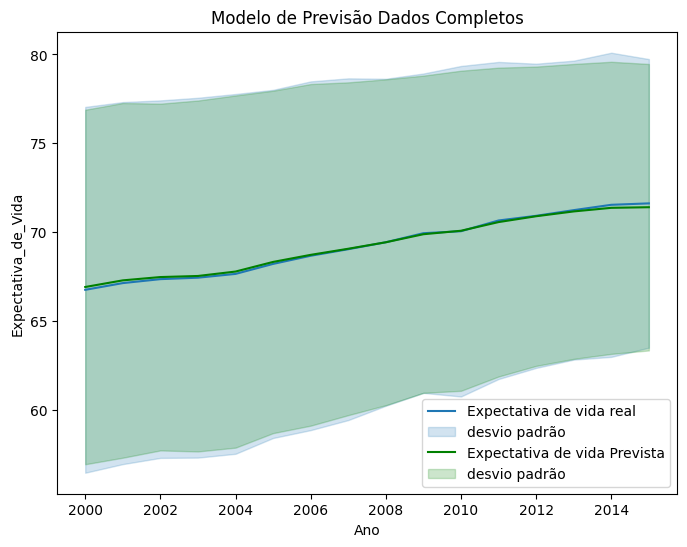

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=df_completo,x='Ano', y='Expectativa_de_Vida',ci='sd')
ax = sns.lineplot(data=results_full,x='Ano', y='Expectativa_Vida_previsto',color='Green',ci='sd')
# Inserindo descritivo na legenda
plt.legend(['Expectativa de vida real','desvio padrão','Expectativa de vida Prevista','desvio padrão'],loc=4) 
plt.title('Modelo de Previsão Dados Completos')
ax.get_figure().savefig("Previsão_Expectativa_de_vida_completo.png")

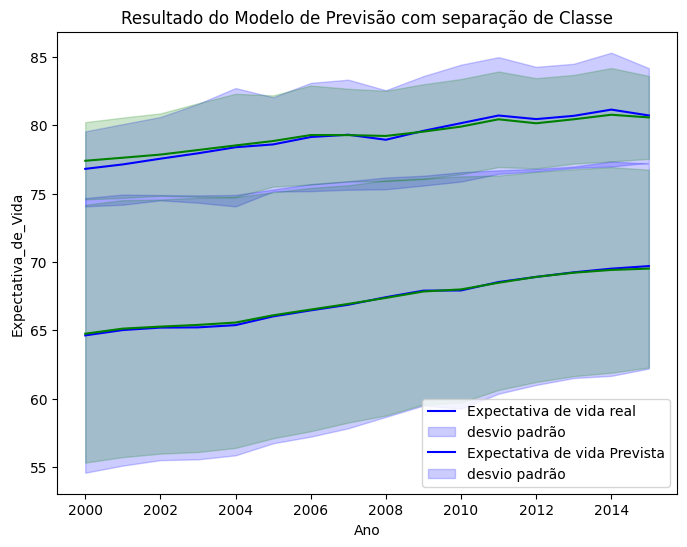

In [ ]:
plt.figure(figsize=(8,6))
ax1 = sns.lineplot(data=df_des,x='Ano', y='Expectativa_de_Vida',ci='sd', color='Blue')
ax1 = sns.lineplot(data=df_emdes,x='Ano', y='Expectativa_de_Vida',ci='sd',color='Blue')
#ax = sns.lineplot(data=results_full,x='Ano', y='Expectativa_Vida_previsto',color='Green',ci='sd')
ax1 = sns.lineplot(data=results_emdes,x='Ano', y='Expectativa_Vida_previsto',color='Green',ci='sd')
ax1 = sns.lineplot(data=results_des,x='Ano', y='Expectativa_Vida_previsto',color='Green',ci='sd')
# Inserindo descritivo na legenda
plt.legend(['Expectativa de vida real','desvio padrão','Expectativa de vida Prevista','desvio padrão'],loc=4) 
plt.title('Resultado do Modelo de Previsão com separação de Classe')
ax1.get_figure().savefig("Previsão_Expectativa_de_vida.png")